# Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/[2024-2025] AN2DL/Homework 1


# Import

In [ ]:
%%writefile requirements.txt
tensorflow==2.17.0
keras==3.4.1

Overwriting requirements.txt


In [ ]:
!pip install -r requirements.txt

In [ ]:
import numpy as np
import os

import tensorflow as tf
import keras as tfk
from keras import layers as tfkl

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
seed = 42

print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")

Tensorflow version -> 2.17.0
Keras version -> 3.4.1


#Load dataset

In [ ]:
data = np.load("datasetWithout.npz")  # Load the training data here

images = data['x_train']
labels = data['y_train']
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

indices = np.random.permutation(len(images))
shuffled_images = images[indices]
shuffled_labels = labels[indices]

Images shape: (11951, 96, 96, 3)
Labels shape: (11951, 1)


In [ ]:
normalized_images = shuffled_images / 255.0
categorical_labels = to_categorical(shuffled_labels).astype('float32')

print(shuffled_labels[0])
print(categorical_labels[0])

[1]
[0. 1. 0. 0. 0. 0. 0. 0.]


# Split dataset

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(normalized_images, categorical_labels, test_size=0.2, stratify=categorical_labels)

# Basic CNN

In [ ]:
input_shape = (96, 96, 3)
output_shape = 8
learning_rate = 0.001
batch_size = 512
epochs = 1000

def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate
):
# convolution senza batch normalization e senza dropout
# solo due layer
# flattening

    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(filters=32, kernel_size=3, padding='same', name='conv1')(input_layer)
    relu1 = tfkl.Activation('relu')(conv1)
    pool1 = tfkl.MaxPooling2D(pool_size=2, strides=2)(relu1)

    conv2 = tfkl.Conv2D(filters=64, kernel_size=3, padding='same', name='conv2')(pool1)
    bn2 = tfkl.Activation('relu', name='act2')(conv2)
    relu2 = tfkl.MaxPooling2D(pool_size=2, name='mp2')(bn2)

    flatten = tfkl.Flatten(name='flatten')(relu2)

    dense = tfkl.Dense(units=output_shape, name='dense')(flatten)
    output_layer = tfkl.Activation('softmax', name='softmax')(dense)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='CNN')

    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    return model

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 96, 96, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv1 (Conv2D)                      │ (None, 96, 96, 32)           │           896 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ activation (Activation)             │ (None, 96, 96, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ max_pooling2d (MaxPooling2D)        │ (None, 32, 32, 32)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ conv2 (Conv2D)                      │ (None, 32, 32, 64)           │        18,496 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ act2 (Activation)                   │ (None, 32, 32, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mp2 (MaxPooling2D)                  │ (None, 16, 16, 64)           │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 16384)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 8)                    │       131,080 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ softmax (Activation)                │ (None, 8)                    │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 150,472 (587.78 KB)

 Trainable params: 150,472 (587.78 KB)

 Non-trainable params: 0 (0.00 B)

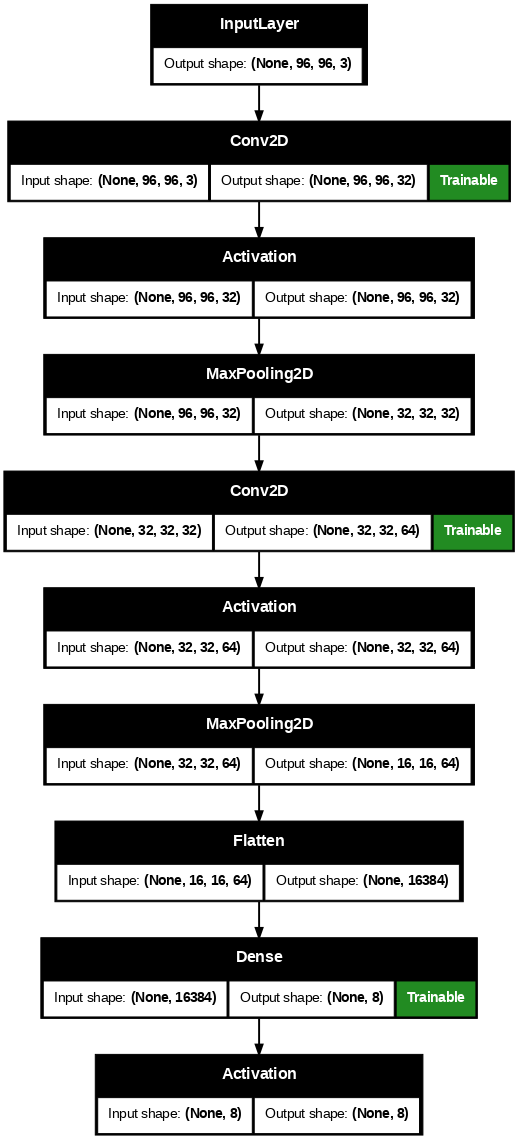

In [ ]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

# Early Stopping

In [ ]:
patience = 20

early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

callbacks = [early_stopping]

# Training

In [ ]:
# Train the model with early stopping callback
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size = batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 537ms/step - accuracy: 0.1925 - loss: 2.0686 - val_accuracy: 0.4538 - val_loss: 1.5497
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4979 - loss: 1.3733 - val_accuracy: 0.6010 - val_loss: 1.0829
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6040 - loss: 1.0396 - val_accuracy: 0.6830 - val_loss: 0.9163
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.7003 - loss: 0.8743 - val_accuracy: 0.7419 - val_loss: 0.7810
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.7519 - loss: 0.7281 - val_accuracy: 0.7775 - val_loss: 0.6865
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7945 - loss: 0.6492 - val_accuracy: 0.8001 - val_loss: 0.6236
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8074 - loss: 0.5819 - val_accuracy: 0.8118 - val_loss: 0.5834
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8211 - loss: 0.5447 - val

In [ ]:
model.save('weights.keras')
del model

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must not be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        # Normalizzare le immagini (applicare la divisione per 255)
        if X.max() > 1.0:  # If max value is greater than 1, assume the range is [0, 255]
            X = X / 255.0

        # Fare la previsione con il modello
        preds = self.neural_network.predict(X)

        # Se l'output è in formato one-hot (shape = 2D), prendere l'argmax per ottenere le classi
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)

        return preds

Overwriting model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}_simple.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 54%)
  adding: weights.keras (deflated 19%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>